In [1]:
import numpy as np
from keras.datasets import mnist

Using TensorFlow backend.
C:\Users\manyasha_n_m\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
import doctest


In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [4]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
X = train_X[(train_y==0)|(train_y==1)]
y = train_y[(train_y==0)|(train_y==1)]
len(X)

12665

Now let's forget that we know how they are classified:)
I am going to use only this training set for this project


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

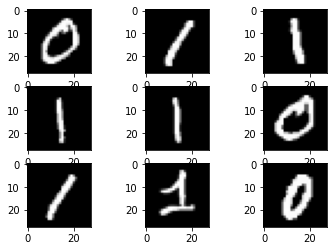

In [7]:
#first few elements of dataset
plt.figure()
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X[i], cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
X_new = np.where(X<50, 0, X) 
X_new = np.where(X_new>0, 1, X_new) 


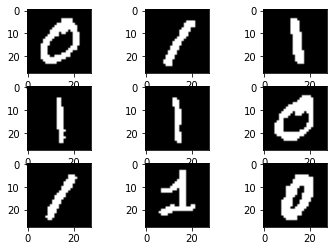

In [9]:
plt.figure()
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_new[i], cmap=plt.get_cmap('gray'))
plt.show()

In [10]:
%run -i "alg.py"

<Figure size 432x288 with 0 Axes>

In [11]:
doctest.testmod()

TestResults(failed=0, attempted=12)

In [18]:
E2 = EMalg(np.asarray(X_new), 2)
E2.alg()

C:\Users\manyasha_n_m\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [19]:
booleans = (E2.pkx[:,0]<0.5)
if booleans[0]: # I know that 0 were always recognized as 0, so I will make False for 0
    booleans = ~booleans
classes = booleans.astype(int)

In [20]:
1-np.sum(abs(classes-y))/len(classes) # classification accuracy

0.9542045005921832

In [21]:
real0 = classes[y==0]
real1 = classes[y==1]
print(len(real0[real0==0])/len(real0)) #zeros recognized as zeros
print(len(real1[real1==1])/len(real1)) #ones recognized as ones

0.9994934999155833
0.9144170869178285


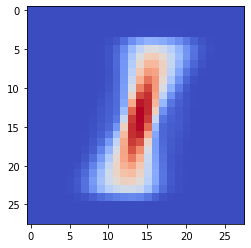

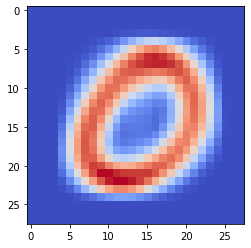

In [22]:
plt.figure()
for pij in E2.pij:
    plt.imshow(pij, cmap=plt.get_cmap('coolwarm'))
    plt.show()

0


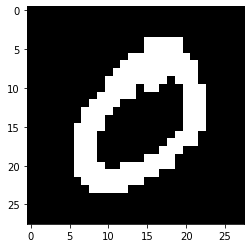

1


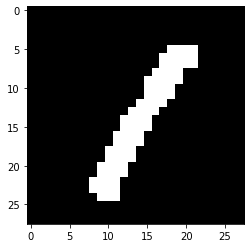

1


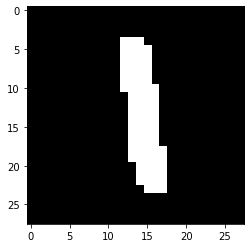

1


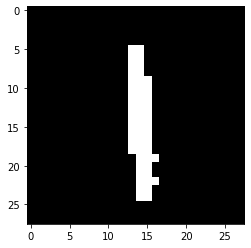

1


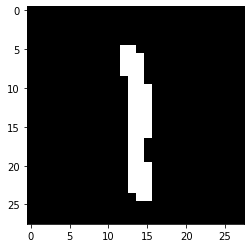

0


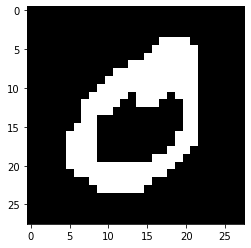

1


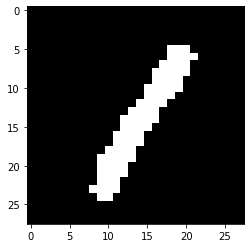

0


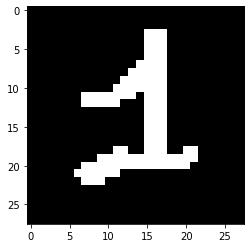

0


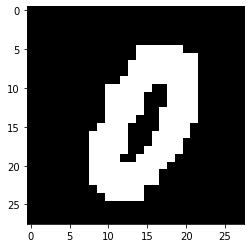

0


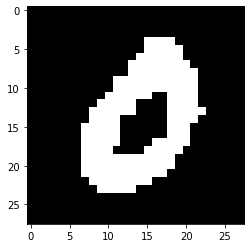

1


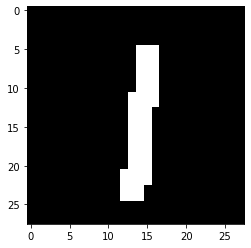

0


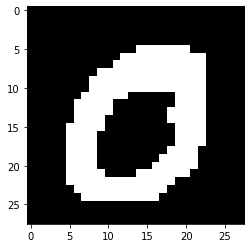

0


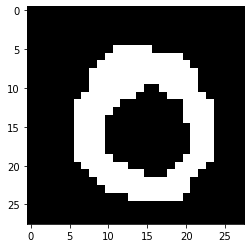

1


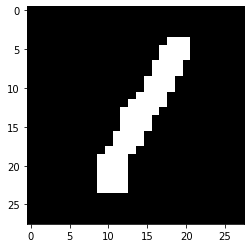

0


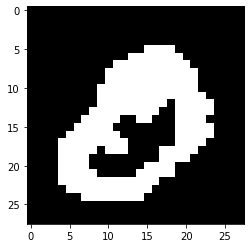

1


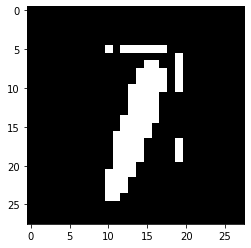

0


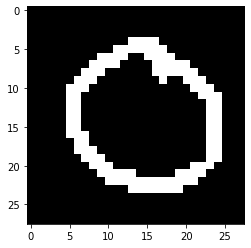

0


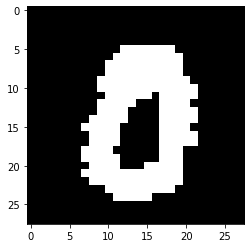

0


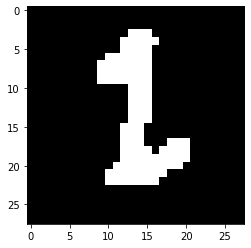

1


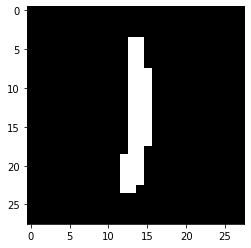

In [23]:
plt.figure()
for i, k in enumerate(E2.pkx[:20]):  
    print(classes[i])
    plt.imshow(X_new[i], cmap=plt.get_cmap('gray'))
    plt.show()
    